In [18]:
import pandas as pd

df = pd.read_csv("C:/Users/User/Desktop/monthly-usage.csv")

df['Month'] = pd.to_datetime(df['Month'])

df = df.sort_values(by=['customerID', 'Month'])

df.head()

,customerID,Region,Month,DataGB
0,C0001,Kisumu,2024-11-01,5.19
1,C0001,Kisumu,2024-12-01,2.20
2,C0001,Kisumu,2025-01-01,1.35
3,C0001,Kisumu,2025-02-01,0.83
4,C0001,Kisumu,2025-03-01,0.88


In [19]:
df_region = df.groupby(['Month', 'Region'])['DataGB'].sum().reset_index()
df_region.head()

,Month,Region,DataGB
0,2024-11-01,Eldoret,209.47
1,2024-11-01,Kisumu,163.98
2,2024-11-01,Mombasa,246.34
3,2024-11-01,Nairobi,143.58
4,2024-11-01,Nakuru,135.64


08:51:15 - cmdstanpy - INFO - Chain [1] start processing
08:51:15 - cmdstanpy - INFO - Chain [1] done processing


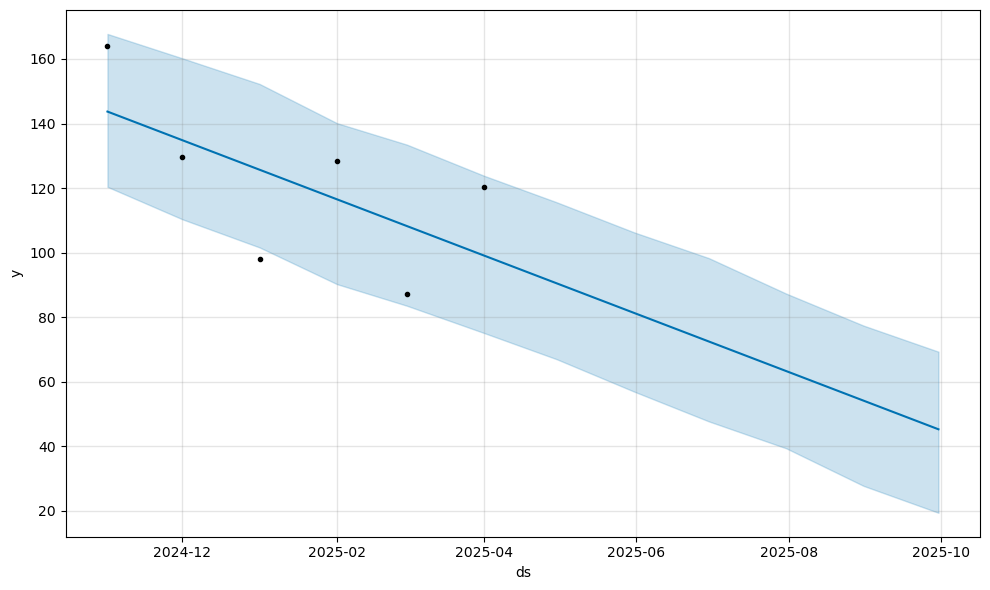

In [20]:
from prophet import Prophet

region_name = 'Kisumu'
region_df = df_region[df_region['Region'] == region_name][['Month', 'DataGB']]

# Renaming columns for Prophet
region_df.columns = ['ds', 'y']

model = Prophet()
model.fit(region_df)

# Future dataframe (6 months)
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

model.plot(forecast);

Now forecast looping Through each Region

08:51:16 - cmdstanpy - INFO - Chain [1] start processing
08:51:16 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Region: Kisumu


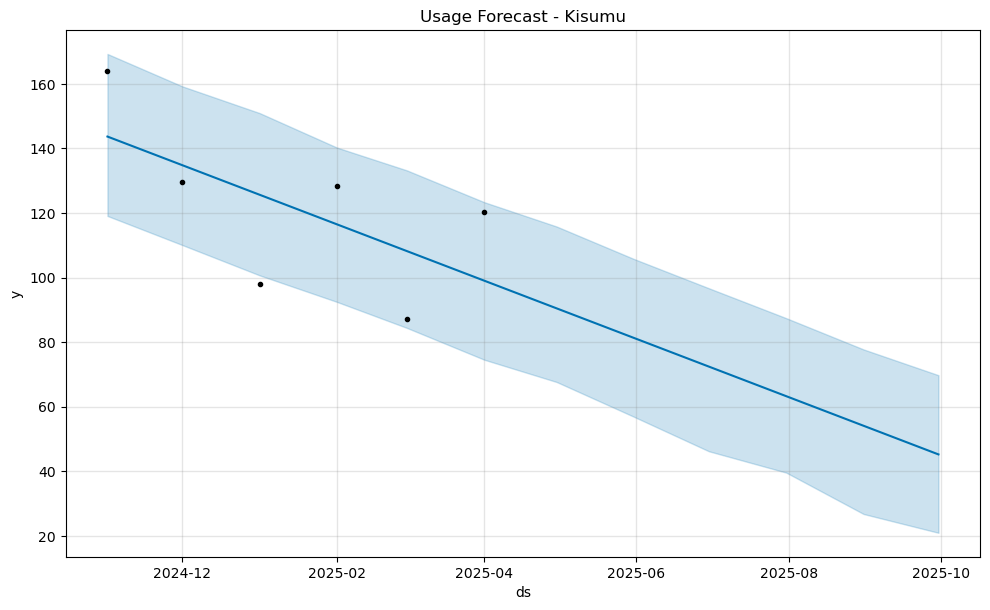

08:51:16 - cmdstanpy - INFO - Chain [1] start processing
08:51:16 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Region: Eldoret


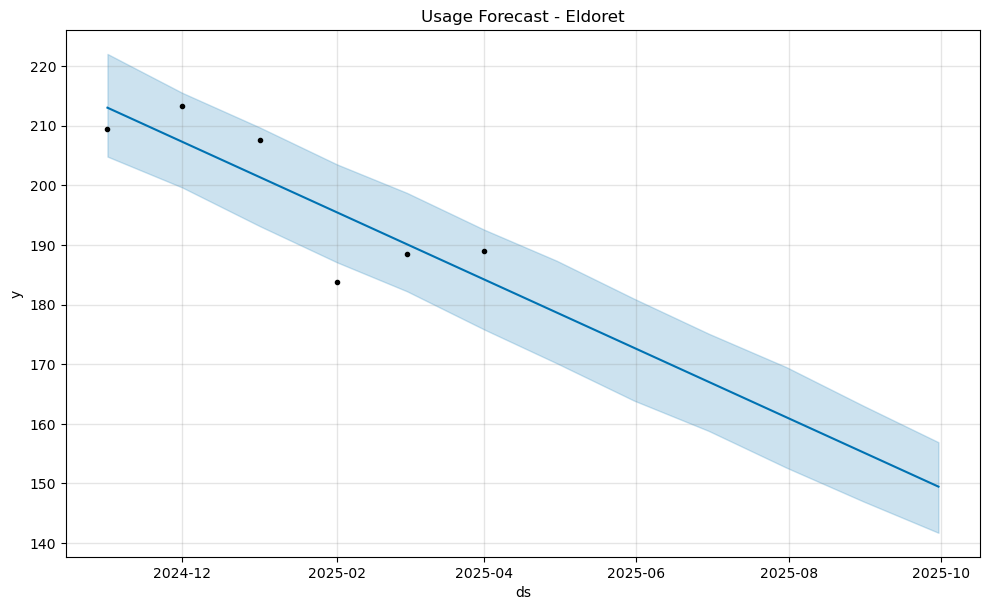

08:51:17 - cmdstanpy - INFO - Chain [1] start processing
08:51:17 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Region: Nairobi


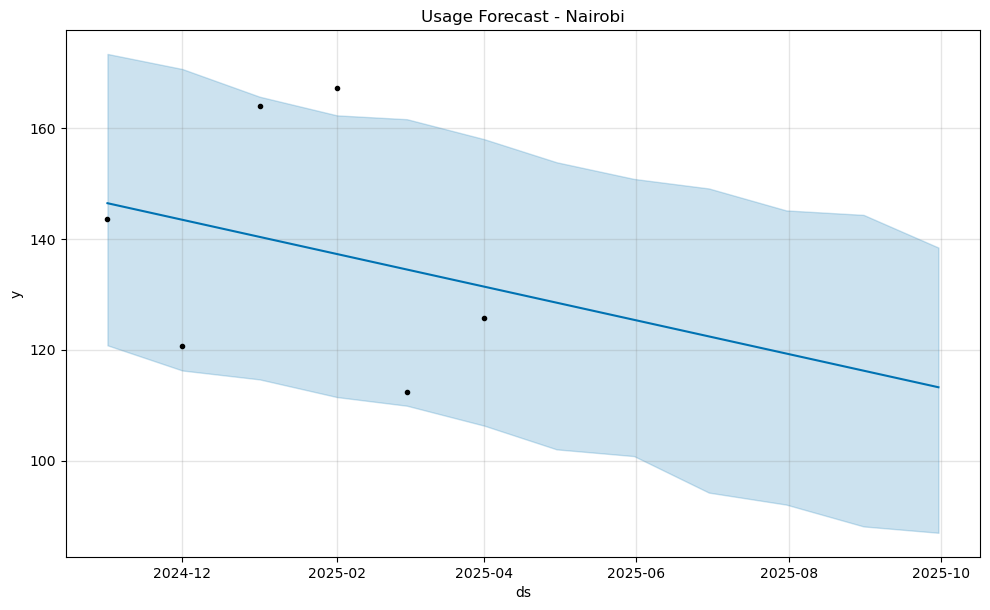

08:51:17 - cmdstanpy - INFO - Chain [1] start processing
08:51:17 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Region: Nakuru


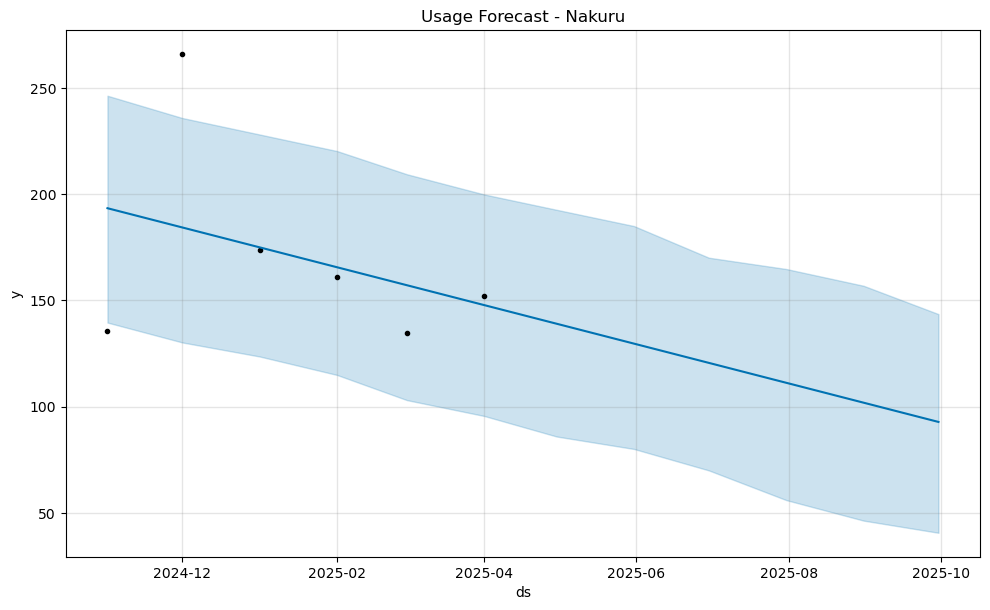

08:51:18 - cmdstanpy - INFO - Chain [1] start processing
08:51:18 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Region: Mombasa


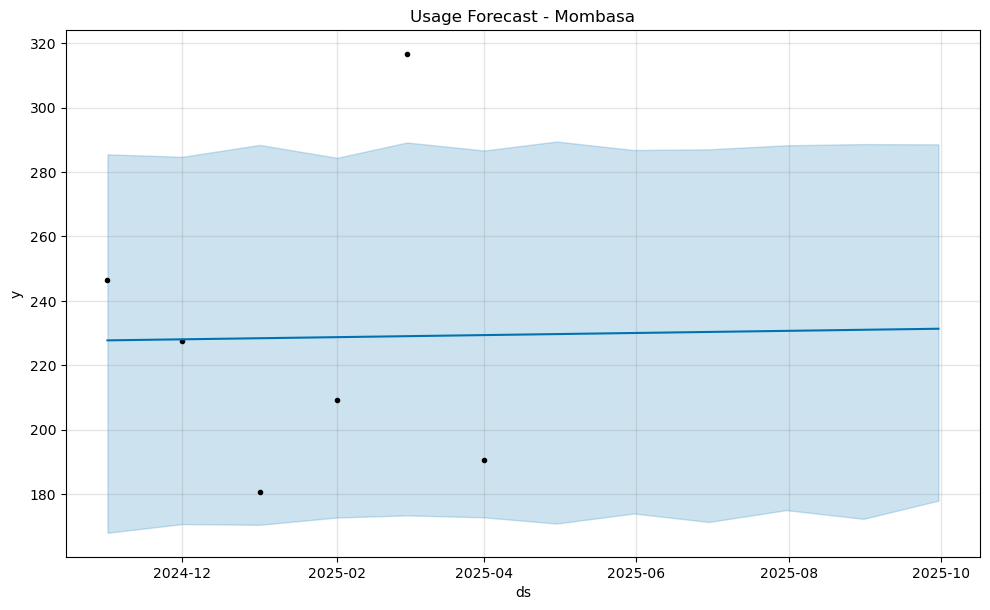

In [21]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Month'])

# Loop through each unique Region
for region in df['Region'].unique():
    regional_df = df[df['Region'] == region]
    regional_agg = regional_df.groupby('Month')['DataGB'].sum().reset_index()
    regional_agg.columns = ['ds', 'y']  # Prophet expects these column names

    model = Prophet()
    model.fit(regional_agg)

    future = model.make_future_dataframe(periods=6, freq='ME')
    forecast = model.predict(future)

    # Plot
    print(f"\nForecast for Region: {region}")
    fig = model.plot(forecast)
    plt.title(f'Usage Forecast - {region}')
    plt.show()
